<a href="https://colab.research.google.com/github/NavyaKiran/Spam-Detection/blob/main/Spam_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**IMPORT THE REQUIRED PACKAGES/DEPENDENCIES**

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
#convert textual data into numerical form (to make it easier for machine learning models to understand)
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

**IMPORT DATA**

In [3]:
#import dataset containing spam and ham mail
#ham mail : not spam/meaningful

data = pd.read_csv('/content/mail_data.csv')
data.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
data = data.where(pd.notnull(data), '')

In [8]:
data.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [13]:
data.shape
#the number of rows and columns in the dataset
#first column in category(spam/ham) and second column in mail (text data)

(5572, 2)

In [11]:
data.info()
#basic information of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [12]:
data.describe()
#descirbe the dataset

,Category,Message
count,5572,5572
unique,2,5157
top,ham,"Sorry, I'll call later"
freq,4825,30


In [20]:
data['Category'].value_counts()
#there are 4825 ham mails and 747 spam mails

,count
Category,
ham,4825
spam,747


**ENCODE CATEGORICAL COLUMN (CATEGORY)**

In [22]:
#let us encode the category with 0 and 1 where 0 = spam and 1 = ham
data.loc[data['Category'] == 'spam', 'Category', ] = 0
data.loc[data['Category'] == 'ham', 'Category', ] = 1

In [23]:
data.head()

,Category,Message
0,1,"Go until jurong point, crazy.. Available only ..."
1,1,Ok lar... Joking wif u oni...
2,0,Free entry in 2 a wkly comp to win FA Cup fina...
3,1,U dun say so early hor... U c already then say...
4,1,"Nah I don't think he goes to usf, he lives aro..."


In [25]:
x = data['Message']
y = data['Category']

In [26]:
print(x)

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                 Will ü b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: Message, Length: 5572, dtype: object


In [27]:
print(y)

0       1
1       1
2       0
3       1
4       1
       ..
5567    0
5568    1
5569    1
5570    1
5571    1
Name: Category, Length: 5572, dtype: object


**CREATE TRAINING AND TEST DATA**

In [28]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 98)

In [31]:
print(x.shape)
print(x_train.shape)
print(x_test.shape)

(5572,)
(4457,)
(1115,)


**TF-IDF VECTORIZER**

In [35]:
#convert the text data into feature vectors for input to logistic regression
vectorizer = TfidfVectorizer(min_df = 1, stop_words = 'english', lowercase= True)
#min_df = if the score of a word is only 1 or less than 1 then it is not considered

In [36]:
x_train_features = vectorizer.fit_transform(x_train)
x_test_features = vectorizer.transform(x_test)
#fit the data only for the training data

In [37]:
#convert y values to integers since y has type object

y_train = y_train.astype('int')
y_test = y_test.astype('int')

In [38]:
# print(x_train_features)
# print(x_test_features)

  (0, 4487)	0.5379616423428506
  (0, 4627)	0.4301527629371994
  (0, 5838)	0.3370101789829184
  (0, 1734)	0.5206082887633493
  (0, 3312)	0.37544243345428463
  (1, 5118)	0.40699730550064805
  (1, 247)	0.40699730550064805
  (1, 3880)	0.28044659758919627
  (1, 2689)	0.3160623934392693
  (1, 5034)	0.22190335476311662
  (1, 2531)	0.33178617866290844
  (1, 5854)	0.2594665699143253
  (1, 2114)	0.31283826682449534
  (1, 1893)	0.40699730550064805
  (2, 4014)	0.22600760273246476
  (2, 7162)	0.13855472309184233
  (2, 4198)	0.2072968027915793
  (2, 1517)	0.2772402566781704
  (2, 6850)	0.17742920533384754
  (2, 2339)	0.14717285312439884
  (2, 1782)	0.18523209972927757
  (2, 3360)	0.14199944692447067
  (2, 3104)	0.13177964969986863
  (2, 3077)	0.1448520383043599
  (2, 5716)	0.1664232022140357
  :	:
  (4452, 1630)	0.20341544123980063
  (4453, 6174)	0.7354882471358105
  (4453, 1630)	0.4496814795800242
  (4453, 2318)	0.5067974005929913
  (4454, 7279)	0.6092622082418729
  (4454, 1004)	0.6417210747738592


In [105]:
spam_text = data[data['Category'] == 0]
ham_text = data[data['Category'] == 1]

In [107]:
from wordcloud import WordCloud
from matplotlib import pyplot as plt
spam_message = ' '.join(spam for spam in spam_text['Message'])
ham_message = ' '.join(ham for ham in ham_text['Message'])

In [116]:
# print(spam_message)
# print(ham_message)

**WORD CLOUD FOR WORDS CONTAINED IN SPAM MESSAGES**

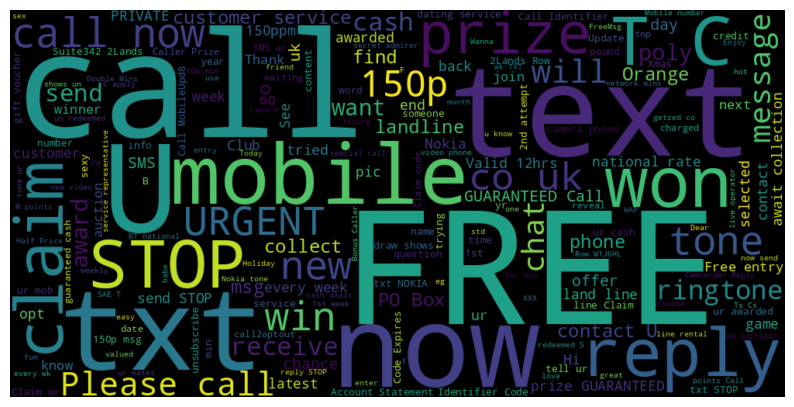

In [114]:
wordcloud_spam = WordCloud(width = 1000, height = 500, background_color= 'black').generate(spam_message)
plt.figure(figsize = (10, 10))
plt.imshow(wordcloud_spam, interpolation = 'bilinear')
plt.axis('off')
plt.show()

**WORD CLOUD FOR WORDS CONTAINED IN HAM MESSAGES**

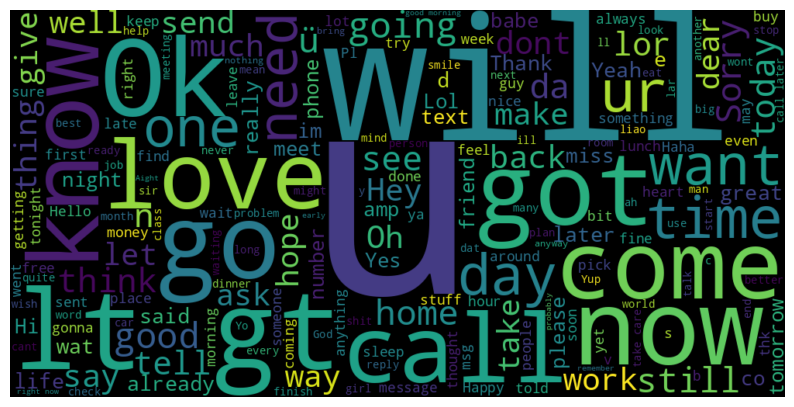

In [115]:
wordcloud_ham = WordCloud(width = 1000, height = 500, background_color= 'black').generate(ham_message)
plt.figure(figsize = (10, 10))
plt.imshow(wordcloud_ham, interpolation = 'bilinear')
plt.axis('off')
plt.show()

**LOGISTIC REGRESSION**

In [39]:
model = LogisticRegression()

**TRAIN MODEL**

In [40]:
model.fit(x_train_features, y_train)

LogisticRegression()

**MODEL EVALUATION**

In [41]:
#prediction on training data
training_predictions = model.predict(x_train_features)
training_accuracy = accuracy_score(y_train, training_predictions)

In [44]:
print("Accuracy on training data : ", training_accuracy)

Accuracy on training data :  0.9690374691496523


In [45]:
#prediction on test data
testing_predictions = model.predict(x_test_features)
testing_accuracy = accuracy_score(y_test, testing_predictions)

In [46]:
print("Accuracy on testing data : ", testing_accuracy)

Accuracy on testing data :  0.9488789237668162


In [49]:
mail = ['A 100$ for car insurance. Do you want to learn more about it? A good deal!']
features = vectorizer.transform(mail)

In [50]:
model.predict(features)

array([1])

In [71]:
mail = ['07732584351 - Rodger Burns - MSG = We tried to call you re your reply to our sms for a free nokia mobile + free camcorder. Please call now 08000930705 for delivery tomorrow']
features = vectorizer.transform(mail)

In [72]:
predictions = [model.predict(features)]

In [73]:
print(predictions)

[array([0])]


In [74]:
for prediction in predictions :
  if prediction[0] == 1:
    print("Not Spam")
  else:
    print("Spam")

Spam


**SUPPORT VECTOR MACHINE (SVM)**

In [75]:
from sklearn import svm
svm_model = svm.SVC(kernel = 'linear', random_state= 98)
svm_model.fit(x_train_features, y_train)

SVC(kernel='linear', random_state=98)

In [76]:
training_predictions = svm_model.predict(x_train_features)
training_accuracy = accuracy_score(y_train, training_predictions)

In [77]:
print("Accuracy on training data : ", training_accuracy)

Accuracy on training data :  0.9964101413506843


In [78]:
testing_predictions = svm_model.predict(x_test_features)
testing_accuracy = accuracy_score(y_test, testing_predictions)

In [79]:
print("Testing Accuracy is : ", testing_accuracy)

Testing Accuracy is :  0.97847533632287


In [85]:
predictions = [svm_model.predict(features)]

In [86]:
print(predictions)

[array([0])]


**NAIVE BAYESIAN CLASSIFIER**

In [80]:
from sklearn.naive_bayes import MultinomialNB
nb_model = MultinomialNB()
nb_model.fit(x_train_features, y_train)

MultinomialNB()

In [81]:
training_predictions = nb_model.predict(x_train_features)
training_accuracy = accuracy_score(y_train, training_predictions)

In [82]:
print("Accuracy on training data : ", training_accuracy)

Accuracy on training data :  0.9842943684092439


In [95]:
testing_predictions = nb_model.predict(x_test_features)
testing_accuracy = accuracy_score(y_test, testing_predictions)

In [96]:
print("Testing Accuracy is : ", testing_accuracy)

Testing Accuracy is :  0.9623318385650225


In [97]:
predictions = [nb_model.predict(features)]

In [98]:
print(predictions)

[array([0])]


**XGB CLASSIFIER**

In [92]:
import xgboost as xgb
from xgboost import XGBClassifier

xgb_model = XGBClassifier()
xgb_model.fit(x_train_features, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [93]:
training_predictions = xgb_model.predict(x_train_features)
training_accuracy = accuracy_score(y_train, training_predictions)

In [94]:
print("Accuracy on training data : ", training_accuracy)

Accuracy on training data :  0.9905766210455463


In [99]:
testing_predictions = xgb_model.predict(x_test_features)
testing_accuracy = accuracy_score(y_test, testing_predictions)

In [100]:
print("Testing Accuracy is : ", testing_accuracy)

Testing Accuracy is :  0.9650224215246637


In [102]:
predictions = [xgb_model.predict(features)]

In [104]:
print(predictions)

[array([0])]
